<a href="https://colab.research.google.com/github/pedrojosefernandez1/k_brazos_FCPSSL/blob/main/ascensoGradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudio comparativo de algoritmos de ascenso del gradiente en un problema de k-armed bandit

*Description:* El experimento compara el rendimiento de algoritmos de ascenso del gradiente en un problema de k-armed bandit.
Se generan gráficas de recompensas promedio para cada algoritmo.

    Author: Jaime Pujante Sáez
    Email: jaime.pujantes@um.es

    Author: Ricardo Javier Sendra Lázaro
    Email: ricardojavier.sendral@um.es

    Author: Pedro José Fernandez Campillo
    Email: pedrojose.fernandez1@um.es

This software is licensed under the GNU General Public License v3.0 (GPL-3.0),
with the additional restriction that it may not be used for commercial purposes.

For more details about GPL-3.0: https://www.gnu.org/licenses/gpl-3.0.html



## Preparación del entorno
Para realizar el estudio, recuperamos las variables y funciones del notebook anterior que se utilizarán en todos los estudios, siendo estas número de brazos y bandidos, ejecuciones, pasos y funciones de ejecución del experimento

In [2]:
import sys
sys.path.append('src')
from arms import ArmNormal, Bandit, ArmBernoulli, ArmBinomial
from plotting import plot_average_rewards, plot_optimal_selections, plot_arm_statistics, plot_regret
from algorithms import Softmax, GradientePreferencias
from experiments import run_experiment

k = 10  # Número de brazos
steps = 1000  # Número de pasos que se ejecutarán cada algoritmo
runs = 500  # Número de ejecuciones

# Creación de los bandit, cada uno con una distribución de Arm distinta
# Bandit Normal
banditNormal = Bandit(arms=ArmNormal.generate_arms(k)) # Generar un bandido con k brazos de distribución normal
optimal_arm_normal = banditNormal.optimal_arm
print(f"Optimal normal arm: {optimal_arm_normal + 1} with expected reward={banditNormal.get_expected_value(optimal_arm_normal)}")
# Bandit Binomial
banditBinomial = Bandit(arms=ArmBinomial.generate_arms(k)) # Generar un bandido con k brazos de distribución binomial
optimal_arm_binomial = banditBinomial.optimal_arm
print(f"Optimal binumial arm: {optimal_arm_binomial + 1} with expected reward={banditBinomial.get_expected_value(optimal_arm_binomial)}")
# Bandit Bernoulli
banditBernoulli = Bandit(arms=ArmBernoulli.generate_arms(k)) # Generar un bandido con k brazos de distribución bernoulli
optimal_arm_bernoulli = banditBernoulli.optimal_arm
print(f"Optimal bernoulli arm: {optimal_arm_bernoulli + 1} with expected reward={banditBernoulli.get_expected_value(optimal_arm_bernoulli)}")

Optimal normal arm: 7 with expected reward=7.31
Optimal binumial arm: 6 with expected reward=5.383218850370663
Optimal bernoulli arm: 8 with expected reward=1.0


## Ejecución del experimento

Se realiza el experimento usando 3 bandidos de 10 brazos:
- Uno con una distribucion Normal
- Uno con una distribucion Binomial
- Uno con una distribucion Bernoulli

Para cada uno se realizan 500 ejecuciones de 1000 pasos cada una.

Se contrastan 2 algoritmos Softmax con tau: 0.5 y 1 y 2 algoritmos de Gradiente de Preferencias con alpha 0.5 y 0.01.

In [3]:
algorithms = [Softmax(k=k, tau=1), Softmax(k=k, tau=0.5), GradientePreferencias(k=k, alpha=0.5), GradientePreferencias(k=k, alpha=0.01)]

# Ejecutar el experimento y obtener las recompensas promedio y promedio de las selecciones óptimas
rewardsNormal, optimal_selectionsNormal, stats_arms_algorithmsNormal, regretNormal = run_experiment(banditNormal, algorithms, steps, runs)
rewardsBinomial, optimal_selectionsBinomial, stats_arms_algorithmsBinomial, regretBinomial = run_experiment(banditBinomial, algorithms, steps, runs)
rewardsBernoulli, optimal_selectionsBernoulli, stats_arms_algorithmsBernoulli, regretBernoulli = run_experiment(banditBernoulli, algorithms, steps, runs)

100%|██████████| 500/500 [00:59<00:00,  8.42it/s]


## Visualización de los resultados

#### Análisis generales de las imagenes

Por lo general todas las imagenes representan en el eje **x**  los **pasos de tiempo**, mientras que en el eje **y** se muestra el valor de esa grafica concreta obtenido por cada algoritmo.


1. **Cuatro líneas de colores distintos representan diferentes valores de τ y α en los algoritmos Softmax y Gradiente de preferencias respectivamente :**
   - **Azul (Softmax con τ = 1):** Representa una estrategia con un 10% de probabilidad de explorar acciones aleatorias.
   - **Naranja (Softmax con τ = 1):** Representa una estrategia con una pequeña probabilidad del 1% de elegir una acción aleatoria (exploración).
   - **Verde (Gradiente con α = 0.5):** Representa un coeficiente de ajuste de un 50%, de modo que cada actualización del gradiente se realice con un 50% de la recompensa que se obtenga.
   - **Rojo (Gradiente con α = 0.01):** Representa un coeficiente de ajuste de un 1%, de modo que cada actualización del gradiente se realice con un 1% de la recompensa que se obtenga.

---


### Bandido con distribucion Normal

#### Selecciones Optimas


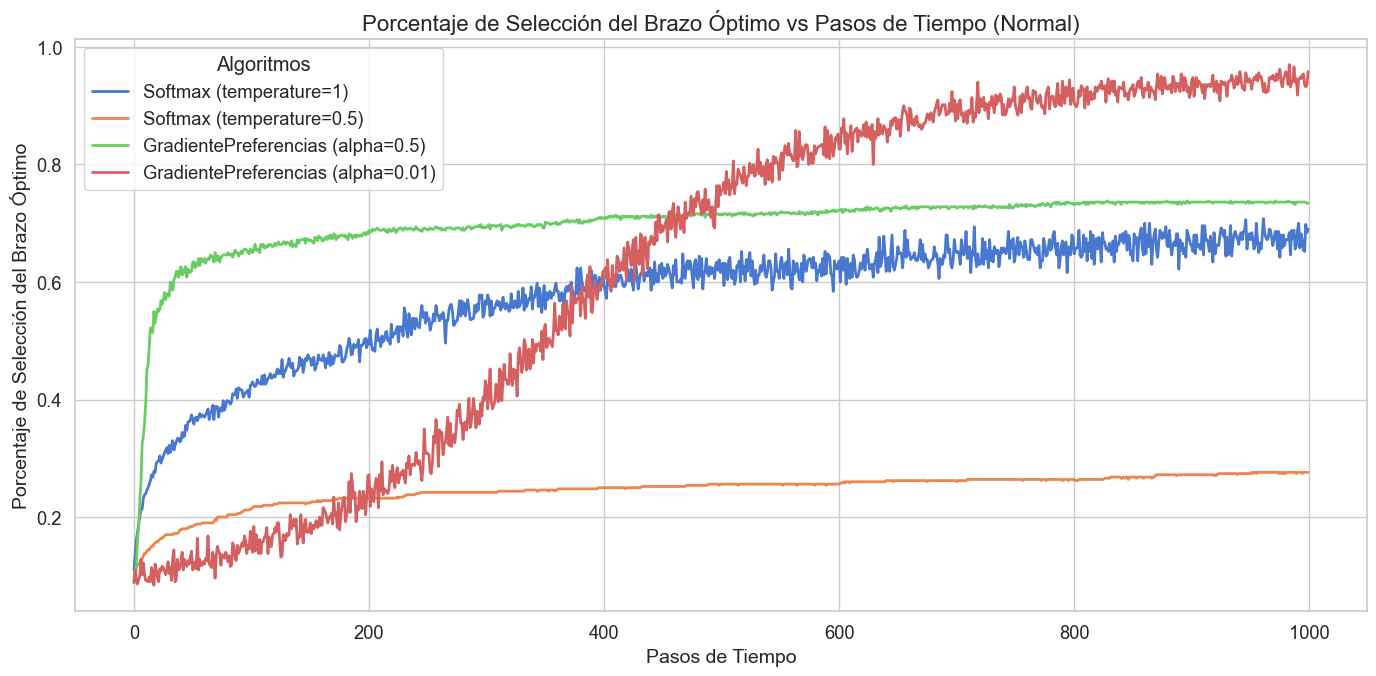

In [4]:
plot_optimal_selections(steps, optimal_selectionsNormal, algorithms, "Normal")


##### **Análisis detallado del gráfico**
**Eje Y:** Representa el **porcentaje de selección del brazo óptimo**, es decir, la frecuencia con la que cada estrategia elige la mejor opción disponible.

**Interpretacion de resultados de los algoritmos:**
   - **Azul (Softmax con τ = 1):** Aunque mejora con el tiempo, su crecimiento es bastante lento, pareciendo que comienza a estabilizarse sobre el paso 600. Al final del gráfico, alcanza algo más del 60%, lo que indica que no explora lo suficiente y tarda en aprender cuál es la mejor opción, puiendo ser esta incluso un óptimo local. 
   - **Naranja (Softmax con τ = 0.5):** Es el peor con diferencia, teniendo un crecimiento mucho más lento. Al final del gráfico, apenas alcanza el 25%, lo que indica que explora muy poco y no llega al óptimo.
   - **Verde (Gradiente con α = 0.5):** En los primeros pasos, alcanza un porcentaje de selección alto rápidamente, pero luego se mantiene entre el 60-70% sin mejorar demasiado. Esto sugiere que explora poco tiempo y enseguida pasa a explotar la mejor solución que ha encontrado, no siendo este el mejor brazo.
   - **Rojo (Gradiente con α = 0.01):** Podemos ver un crecimiento muy lento que va aumentando con el paso del tiempo, debido a un alpha muy pequeño. Entre los pasos 200 y 400 podemos apreciar la mayor pendiente de aprendizaje, en la que encuentra el brazo óptimo y comienza a explotarlo. Al final, es el algoritmo que encuentra la solución óptima.


#### Rechazo acumulado

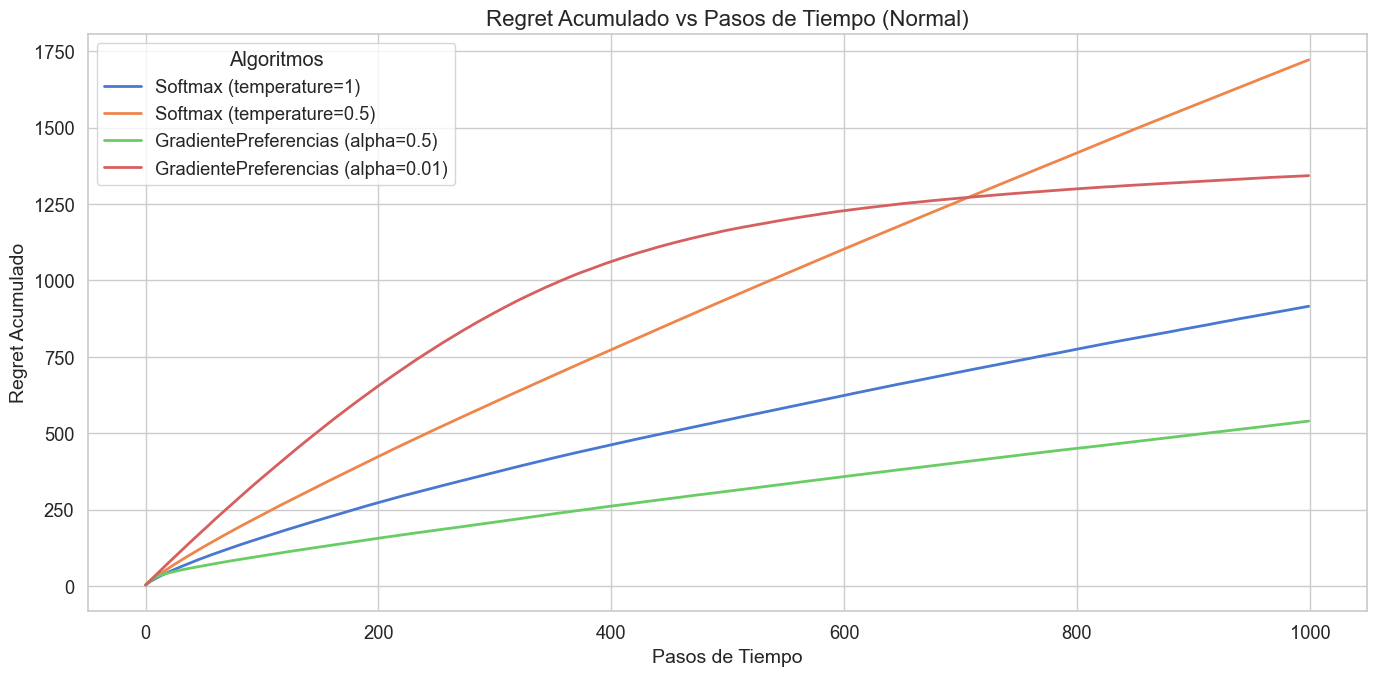

In [5]:
plot_regret(steps, regretNormal, algorithms, "Normal")

##### Analisis detallado del gráfico:

**Eje Y (Rechazo Acumulado):** Muestra la cantidad de recompensa que se ha perdido en comparación con la mejor estrategia posible.


   - **Azul (Softmax con τ = 1):** Representa una estrategia con un 10% de probabilidad de explorar acciones aleatorias.
   - **Naranja (Softmax con τ = 0.5):** Representa una estrategia con una pequeña probabilidad del 1% de elegir una acción aleatoria (exploración).
   - **Verde (Gradiente con α = 0.5):** Representa un coeficiente de ajuste de un 50%, de modo que cada actualización del gradiente se realice con un 50% de la recompensa que se obtenga.
   - **Rojo (Gradiente con α = 0.01):**



**Interpretacion de resultados de los algoritmos**
1. **Rechazos más bajo (mejor desempeño):**
   - **Gradiente con α = 0.5 (verde) tiene el menor rechazo acumulado.** Esto indica que logra aprender un brazo con buen valor rápidamente al explorar lo suficiente como para encontrarlo, aunque el que no tienda a ser horizontal indica que no ha encontrado el óptimo.
   - **Softmax con τ = 1 (azul) tiene el segundo menor rechazo acumulado.** Aunque es el segundo mejor, no parece estabilizarse en ningún momento, lo que nos indica que no logra aprender el brazo óptimo, aunque la solución que obtiene es lo suficientemente buena para obtener mejores resultados que los otros dos algoritmos.
   
2. **Rechazos más alto (peor desempeño):**
   - **Softmax con τ = 0.5 (naranja) tiene el peor desempeño.** Su curva de rechazo acumulado crece rápidamente porque no explora lo suficiente al inicio y tarda demasiado en descubrir una opción que ni siquiera es buena, le falta mucha exploración.
   - **Gradiente con α = 0.01 (rojo) también tiene un rechazo alto,** ya que explora demasiado y cuando comienza a explotar la mejor opción el experimento ya casi ha acabado.

3. **Tendencias a largo plazo:**
   - La curva **verde (Gradiente con α = 0.5) sigue creciendo**, lo que confirma que aunque tiene un buen brazo no ha encontrado el óptimo o no lo explota lo suficiente.
   - La curva **azul (Softmax con τ = 1) sigue crece como la anterior**, lo que muestra una tendencia similar a la anterior pero sin tener el brazo óptimo.
   - La curva **naranja (Softmax con τ = 0.5) sigue creciendo constantemente**, lo que indica que no explora lo suficiente y no aprende el óptimo de manera eficiente.
   - La curva **roja (Gradiente con α = 0.01) es la que menos rápido crece que la azul pero más lento que la naranja**, lo que sugiere que es la que más está explotando la solución óptima aunque le haya costado encontarla



### Bandido con distribucion Binomial

#### Selecciones Optimas


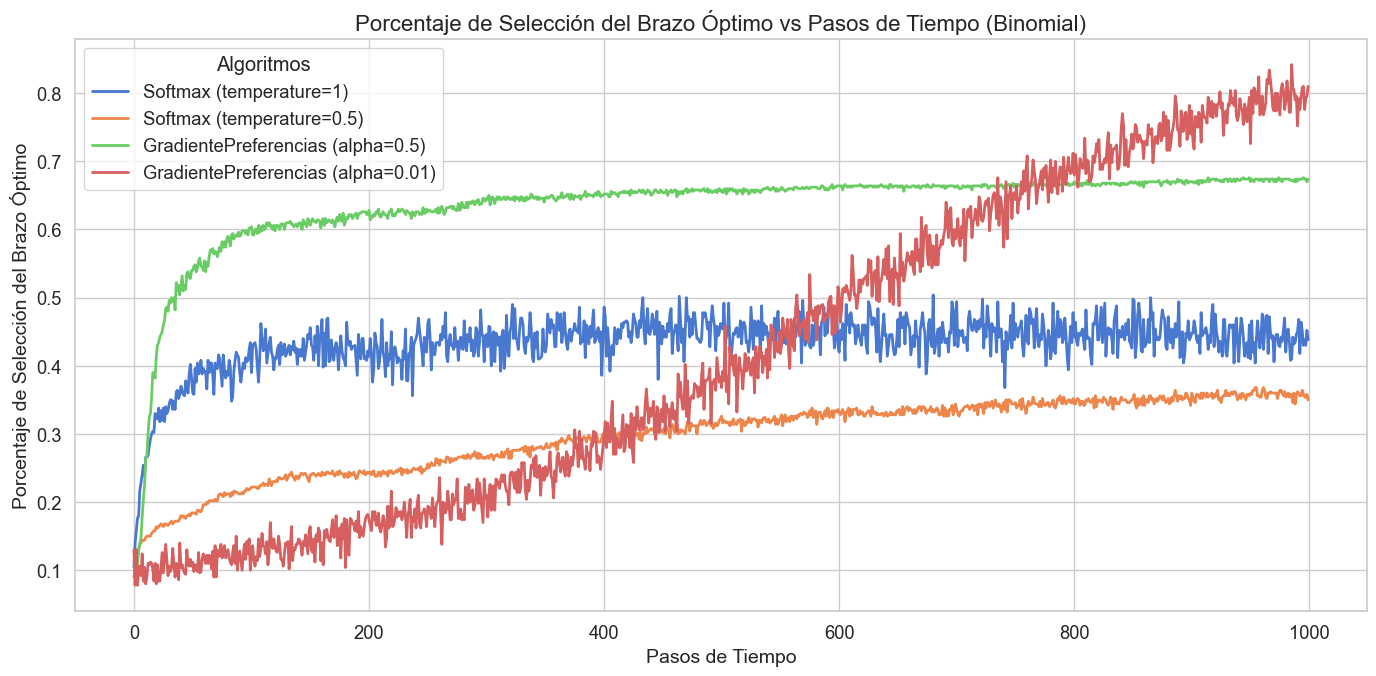

In [8]:
plot_optimal_selections(steps, optimal_selectionsBinomial, algorithms, "Binomial")

##### Analisis detallado del gráfico:

##### **Análisis detallado del gráfico**
**Eje Y:** Representa el **porcentaje de selección del brazo óptimo**, es decir, la frecuencia con la que cada estrategia elige la mejor opción disponible.

**Interpretacion de resultados de los algoritmos:**
   - **Azul (Softmax con τ = 1):** Aunque mejora con el tiempo, su rápido crecimiento para alrededor del 45%, mostrando un comportamiento inestable que ronda entre el 40 y 50% hasta el final del experimento. Esto parece indicar que nencuentra un óptimo local, pero aunque explore no se queda con el brazo óptimo.
   - **Naranja (Softmax con τ = 0.5):** Es el peor, aunque en este caso se comporta mejor, con una pendiente de aprendizaje algo más pronunciada. De cualquier modo apenas alcanza el 35%, lo que vuelve a indicar que explora muy poco y no llega al óptimo.
   - **Verde (Gradiente con α = 0.5):** En los primeros pasos, alcanza un porcentaje de selección alto rápidamente, pero luego se mantiene alrededor del 75% sin mejorar demasiado. Esto sugiere que explora poco tiempo y enseguida pasa a explotar la mejor solución que ha encontrado, no siendo este el mejor brazo.
   - **Rojo (Gradiente con α = 0.01):** Podemos ver un crecimiento algo más lento incluso que en la distribución anterior, que va aumentando con el paso del tiempo, debido a un alpha muy pequeño. Llegando al final a encontrar la solución óptima.

#### Rechazo acumulado

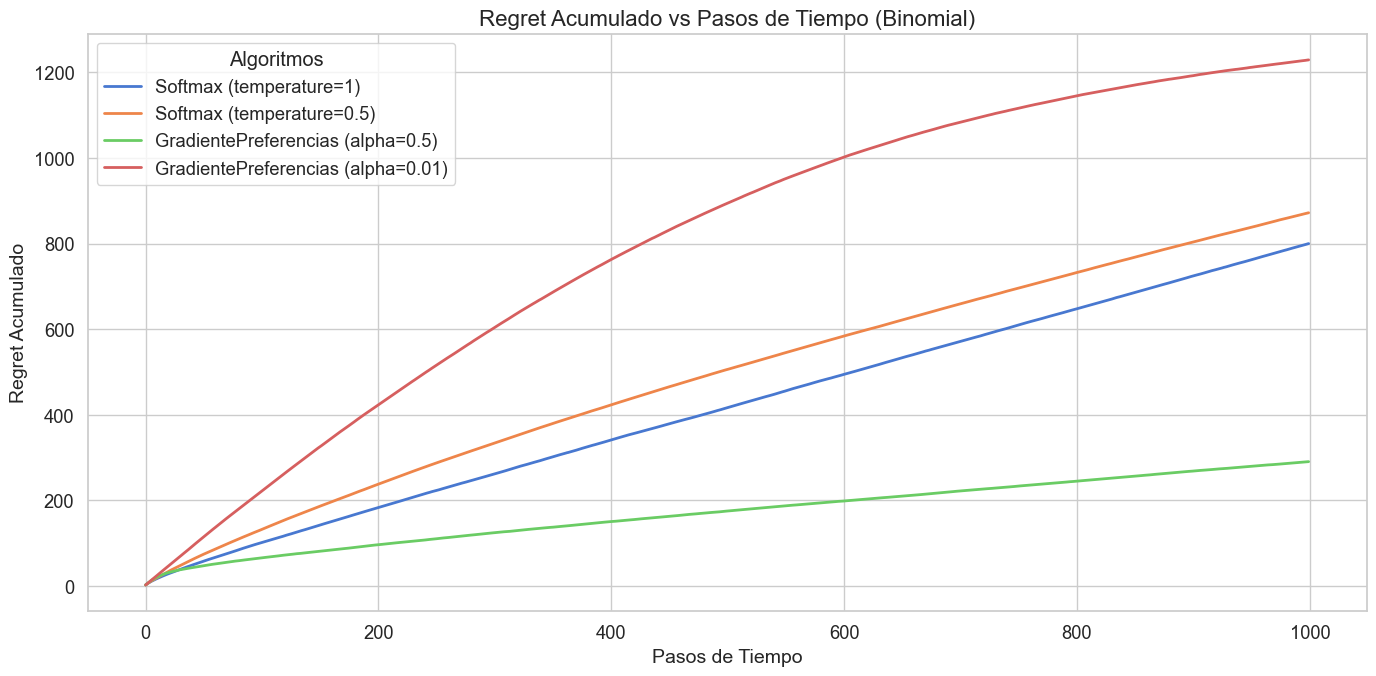

In [7]:
plot_regret(steps, regretBinomial, algorithms, "Binomial")

##### Analisis detallado del gráfico:

**Eje Y (Rechazo Acumulado):** Muestra la cantidad de recompensa que se ha perdido en comparación con la mejor estrategia posible.

**Interpretacion de resultados de los algoritmos:**
- **El algoritmo Gradiente con α = 0.5 (verde) minimiza el rechazo de manera eficiente**, lo que confirma que encuentra un buen balance entre exploración y explotación aunque la cuesta positiva de la línea nos indica que no ha encontrado el óptimo.
- **Softmax con τ = 0.5 (naranja) y Softmax con τ = 1 (azul) tiene un rechazo alto y estable**, con una línea recta que nos indica que no está explorando (o no lo suficiente para ser apreciable en la longitud del experimento) y se han centrado en una opción no óptima, siendo la de Softmax con τ = 1 una solución mejor que la de Softmax con τ = 0.5.
- **Gradiente con α = 0.01 (rojo) acumula bastante rechazo al final del experimento**, aunque la tendencia de la curva, la cual parece estabilizarse, parece indicar que la exploración ha dado sus frutos y ha encontrado la solución óptima, aunque no le de tiempo en el experimento para explotarla lo suficiente.

### Bandido con distribucion Bernoulli

#### Selecciones Optimas


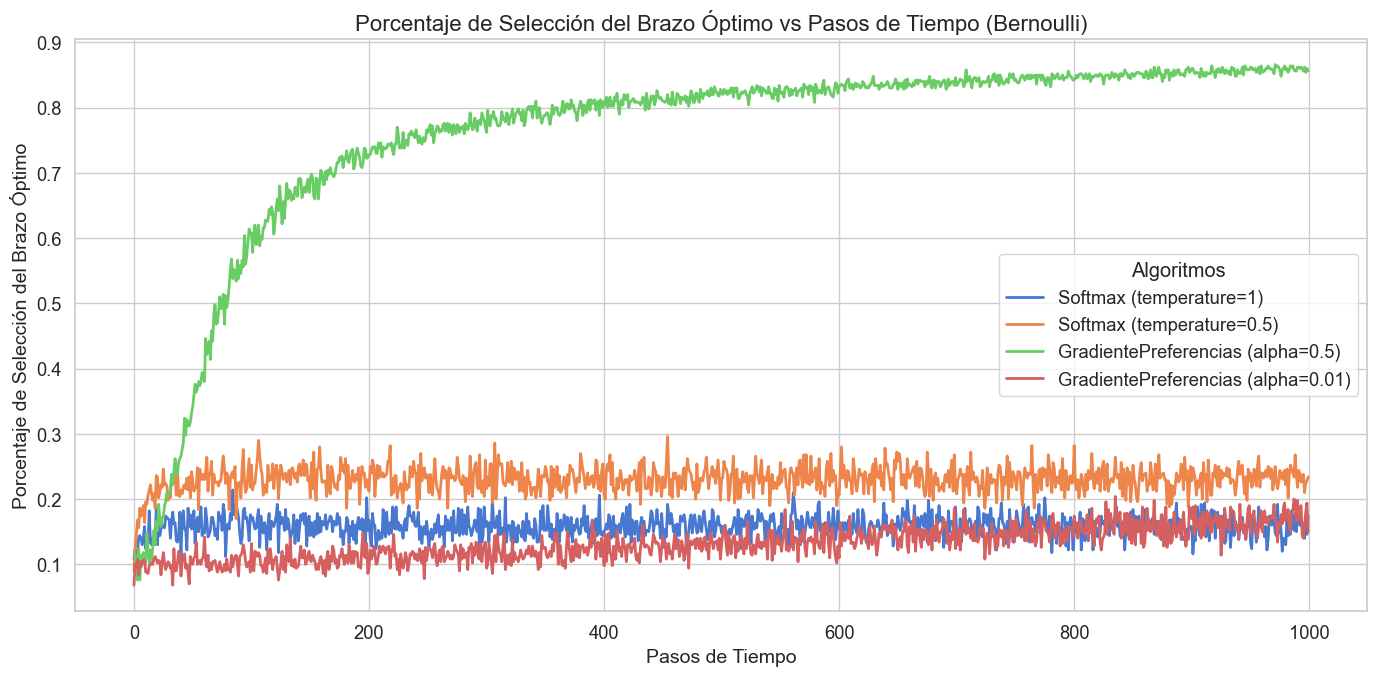

In [9]:
# Ejecutar el experimento y obtener las recompensas promedio y promedio de las selecciones óptimas

plot_optimal_selections(steps, optimal_selectionsBernoulli, algorithms, "Bernoulli")


##### Analisis detallado del gráfico:

##### **Análisis detallado del gráfico**
**Eje Y:** Representa el **porcentaje de selección del brazo óptimo**, es decir, la frecuencia con la que cada estrategia elige la mejor opción disponible.

**Interpretacion de resultados de los algoritmos:**
   - **Azul (Softmax con τ = 1):** Aprende poco, explorando y manteniéndose en valores bajos durante todo el experimento. No se observa una pendiente ni nada que indique que está explorando, por lo que parece que se ha estancado en una opción no óptima. 
   - **Naranja (Softmax con τ = 0.5):** Aunque se comporta mejor que el anterior, tiene el mismo comportamiento que el anterior. Tiene mejor exploración al inicio, llegando alrededor del 25%, pero se mantiene en el tiempo en un brazo no óptimo el resto del experimento.
   - **Verde (Gradiente con α = 0.5):** Es el mejor de la gráfica con diferencia. La curva indica que se explora de manera más activa hasta el paso 200, a partir del cual se comienza a explotar la solución óptima.
   - **Rojo (Gradiente con α = 0.01):** Tiene un comportamiento similar a las otras distribuciones, pero es mucho más lento. Parece que se aprecia una leve cuesta que indica que está explorando, pero no es lo suficiente como para superar claramente a la curva azul (Softmax con τ = 1) al final del experimento.


#### Rechazo acumulado

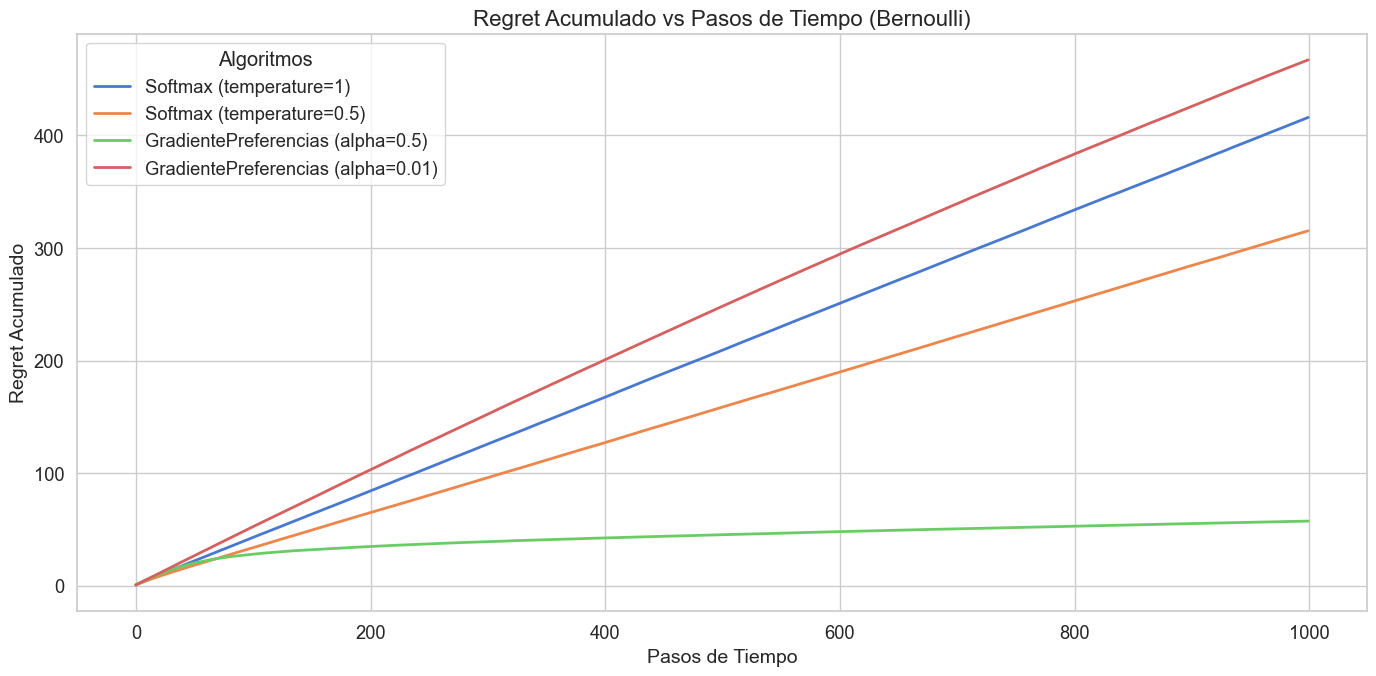

In [ ]:
plot_regret(steps, regretBernoulli, algorithms, "Bernoulli")

##### Analisis detallado del gráfico:

**Eje Y (Rechazo Acumulado):** Muestra la cantidad de recompensa que se ha perdido en comparación con la mejor estrategia posible.

**Interpretacion de resultados de los algoritmos:**
- **El algoritmo Gradiente con α = 0.5 (verde) minimiza el rechazo de manera eficiente** en poco tiempo, lo que confirma que encuentra un buen balance entre exploración y explotación.
- **Softmax con τ = 0.5 (naranja) acumula bastante rechazo al final del experimento**, aunque la tendencia de la curva parece indicar que sigue explorando para encontrar una solución mejor
- **Gradiente con α = 0.01 (rojo) y Softmax con τ = 1 (azul) tiene un rechazo alto y estable**, con una línea recta que nos indica que no está explorando (o no lo suficiente para ser apreciable en la longitud del experimento) y se han centrado en una opción no óptima, siendo la de Softmax con τ = 1 una solución mejor que la de Gradiente con α = 0.01

## **Conclusiones**

En este estudio hemos analizado la eficacia del algoritmo de **ascenso por gradiente** aplicado a un problema de optimización continua, examinando cómo diferentes valores de la tasa de aprendizaje (**α**) y del parámetro de temperatura (**τ**) afectan la velocidad y precisión de convergencia hacia el mínimo local de una función objetivo dada. A partir de los resultados obtenidos y las gráficas generadas, podemos extraer las siguientes conclusiones:

### **1. Impacto de la tasa de aprendizaje (α)**
El parámetro α es crucial para el comportamiento del algoritmo:
- **Tasa baja (α pequeño)**: Garantiza convergencia estable pero lenta. El algoritmo necesita más iteraciones para llegar al mínimo local, aumentando el coste computacional.
- **Tasa alta (α grande)**: Acelera inicialmente la convergencia, pero puede provocar inestabilidad o divergencia del algoritmo, haciendo que oscile alrededor del mínimo sin alcanzarlo con precisión.

Las gráficas del estudio confirman que:
- Valores moderados de α proporcionan un equilibrio óptimo entre velocidad y estabilidad.
- Valores extremos (muy bajos o muy altos) disminuyen significativamente la eficiencia y precisión del algoritmo.

### **2. Impacto del parámetro de temperatura (τ)**
El parámetro τ influye directamente en la selección probabilística de acciones:
- **τ bajo (cercano a 0)**: Favorece fuertemente la selección de la acción óptima conocida, limitando la exploración. Esto puede llevar a una rápida convergencia si la elección inicial es adecuada, pero podría impedir descubrir mejores alternativas.
- **τ alto**: Aumenta la aleatoriedad en la elección de acciones, favoreciendo una exploración extensiva, pero ralentizando la convergencia hacia el óptimo.

Los resultados muestran que:
- Valores moderados de τ permiten un equilibrio eficiente entre exploración y explotación, optimizando la convergencia hacia el mínimo local.
- Valores muy bajos restringen excesivamente la exploración, reduciendo la eficacia en escenarios donde el mínimo local inicial no es el óptimo global.
- Valores muy altos provocan exploración excesiva, ralentizando significativamente la convergencia.

### **3. Convergencia y precisión**
La elección adecuada de ambos parámetros (α y τ) mejora notablemente el desempeño:
- Combinaciones moderadas de α y τ alcanzan rápida y precisamente el mínimo, optimizando tanto recursos computacionales como calidad del resultado.
- Combinaciones extremas comprometen la eficiencia y precisión del resultado, ya sea por lentitud (α bajo, τ alto) o por inestabilidad (α alto, τ bajo).

### **4. Aplicabilidad práctica**
- En situaciones reales como optimización de parámetros en modelos de aprendizaje automático o ajuste de sistemas dinámicos, valores moderados tanto de **α como de τ** generalmente resultan ser la elección más acertada para obtener resultados eficientes y efectivos.
- Elegir incorrectamente estos parámetros puede derivar en pérdidas significativas, tanto en rendimiento como en tiempo computacional.

### **5. Generalización de resultados**
- Aunque los resultados específicos pueden depender de la función objetivo y contexto del problema, la tendencia general observada sobre el impacto de α y τ es ampliamente aplicable en otros problemas similares de optimización continua.

En resumen, **seleccionar valores equilibrados tanto para la tasa de aprendizaje (α) como para el parámetro de temperatura (τ) es esencial para obtener resultados óptimos en términos de convergencia rápida y precisa en algoritmos de ascenso por gradiente. Combinaciones moderadas de ambos parámetros ofrecen el mejor compromiso entre eficiencia, estabilidad y capacidad de exploración**.

Si tuvieramos que hacer un compromiso y elegir el mejor algoritmo de forma general en los tres problemas nos quedaríamos con el **Gradiente de Preferencias con α = 0.5**, ya que de forma general es el que mejor se comporta a lo largo del experimento. Sin embargo, en caso de que dispusiéramos de un experimento más largo con mayor número de pasos podría interesarnos el **Gradiente de Preferencias con α = 0.01**, ya que aunque muestra una evolución mucho más lenta cuando le da tiempo a converger en una solución óptima puede superar al de α = 0.5